In [76]:
# Dowload url : "https://drive.google.com/file/d/1CGiAWso43GCsNo_faRq4jdDIlmwy7YI4/view"

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [53]:
train_dir = "Fruits_Vegetables\\train"
test_dir = "Fruits_Vegetables\\test"

In [54]:
train_fruite_path = os.listdir(train_dir)
print(train_fruite_path)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [55]:
len(train_fruite_path)

36

In [56]:
X = []
Y = []
Z = []

In [57]:
for i, f in enumerate(train_fruite_path):
    train_images_path = os.listdir(f"{train_dir}\\{f}")
    for image in train_images_path:
        img = cv2.imread(f"{train_dir}\\{f}\\{image}")
        if img is not None:
            img = cv2.resize(img, (128, 128))
            X.append(img)
            Y.append(i)
            Z.append(f)
        else:
            print(f'{train_dir}\\{f}\\{image}')

Fruits_Vegetables\train\bell pepper\Image_56.jpg


In [58]:
X_test = []
Y_test = []
Z_test = []

In [59]:
test_fruite_path = os.listdir(train_dir)
print(test_fruite_path)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [60]:
for i, f in enumerate(test_fruite_path):
    test_images_path = os.listdir(f"{test_dir}\\{f}")
    for image in test_images_path:
        img = cv2.imread(f"{test_dir}\\{f}\\{image}")
        if img is not None:
            img = cv2.resize(img, (128, 128))
            X_test.append(img)
            Y_test.append(i)
            Z_test.append(f)
        else:
            print(f'{test_dir}\\{f}\\{image}')

In [61]:
X_np = np.array(X)
Y_np = np.array(Y)

X_test_np = np.array(X_test)
Y_test_np = np.array(Y_test)


In [62]:
print(X_np.shape)
print(Y_np.shape)

print(X_test_np.shape)
print(Y_test_np.shape)

(3114, 128, 128, 3)
(3114,)
(359, 128, 128, 3)
(359,)


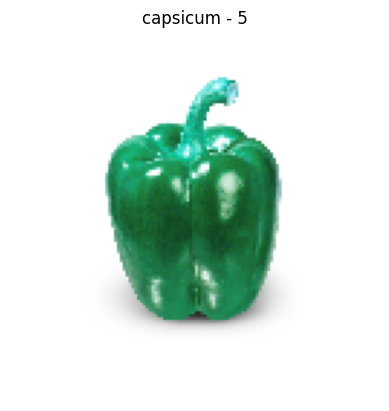

In [63]:
plt.imshow(X_np[500])
plt.title(f"{Z[500]} - {Y_np[500]}")
plt.axis(False)
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dropout(0.5),
    
    Dense(128, activation="relu"),
    
    Dense(36, activation="softmax")
])

c:\Users\Abdullah Tariq\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [74]:
model.fit(X_np, Y_np, epochs=15)

Epoch 1/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 178ms/step - accuracy: 0.0419 - loss: 29.3305
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.0650 - loss: 3.4291
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.1678 - loss: 3.1372
Epoch 4/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.2317 - loss: 2.8131
Epoch 5/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.3467 - loss: 2.3582
Epoch 6/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - accuracy: 0.4474 - loss: 1.9796
Epoch 7/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.5146 - loss: 1.7309
Epoch 8/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.5838 - loss: 1.5199
Epoch 9/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - accuracy: 0.6457 - loss: 1.2566
Epoch 10/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 198ms/step - accuracy: 0.7304 - loss: 0.9197
Epoch 11/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 231ms/step - accuracy: 0.7635 - loss: 0.8154
Epoch 12/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 1

In [82]:
test_loss , test_acc = model.evaluate(X_test_np, Y_test_np)
print(f"Accuracy : {test_acc*100}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.9256 - loss: 0.7343
Accuracy : 94.98607516288757%


In [79]:
model.save("Fruits_Vegetables.h5")

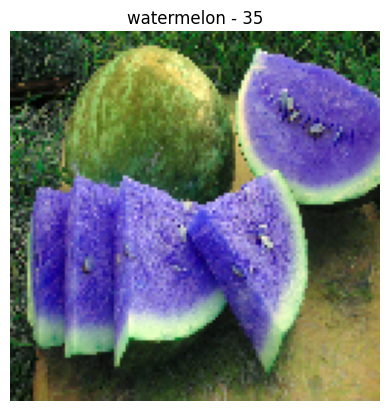

In [87]:
plt.imshow(X_test_np[350])
plt.title(f"{Z_test[350]} - {Y_test_np[350]}")
plt.axis(False)
plt.show()

In [89]:
y_pred = model.predict(X_test_np)
index = np.argmax(y_pred[350])
print(f"Predicted : {train_fruite_path[index]}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step
Predicted : watermelon


In [90]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,309,286 (12.62 MB)

 Trainable params: 3,309,284 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)